In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

In [3]:
penguins = pd.read_csv('..\\data\\penguins.csv').dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [5]:
penguins_ohe = pd.get_dummies(penguins)
penguins_ohe.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True


In [9]:
X = penguins_ohe[['bill_length_mm']]
y = penguins_ohe[['species_Adelie']]

logistic_model = LogisticRegression(penalty='l2')
logistic_model.fit(X, np.ravel(y))

print(f'w1: {logistic_model.coef_}')
print(f'w0: {logistic_model.intercept_}')

w1: [[-1.14305418]]
w0: [49.01692562]


In [10]:
logistic_model.predict_proba(X)[0:6]

array([[1.30799652e-02, 9.86920035e-01],
       [2.05066613e-02, 9.79493339e-01],
       [4.96495104e-02, 9.50350490e-01],
       [8.52199486e-04, 9.99147801e-01],
       [1.63845452e-02, 9.83615455e-01],
       [1.04348115e-02, 9.89565189e-01]])

In [11]:
logistic_model.predict(X)[0:6]

array([ True,  True,  True,  True,  True,  True])

In [12]:
logistic_model.score(X, np.ravel(y))

0.9429429429429429

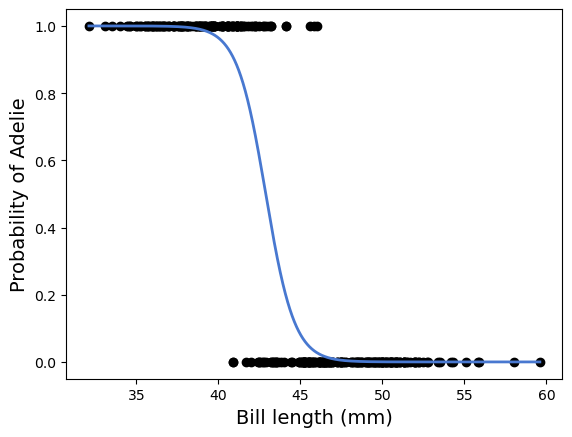

In [19]:
plt.scatter(X, y, color='black')

xrange = np.linspace(X.min(), X.max(), 10000)
yhat = logistic_model.predict(X).reshape(-1, 1).astype(int)

xrange_df = pd.DataFrame(xrange, columns=['bill_length_mm'])
yprob = logistic_model.predict_proba(xrange_df)[:, 1]

plt.plot(xrange, yprob, color='#4878d0', linewidth=2)
plt.xlabel('Bill length (mm)', fontsize=14)
plt.ylabel('Probability of Adelie', fontsize=14)

plt.show()

In [24]:
X = penguins_ohe[['bill_length_mm', 'bill_depth_mm']]
y = penguins_ohe[['species_Gentoo']]

logistic_model = LogisticRegression(penalty='l2')
logistic_model.fit(X, np.ravel(y))

print(f'w1: {logistic_model.coef_}')
print(f'w0: {logistic_model.intercept_}')

w1: [[ 0.44691134 -2.9751132 ]]
w0: [28.3295998]


In [25]:
logistic_model.score(X, y)

0.9819819819819819

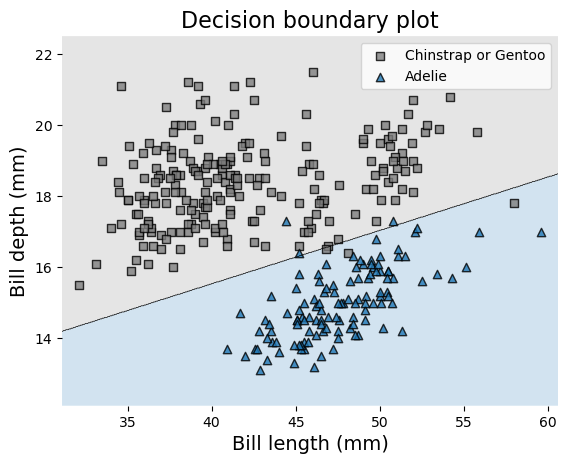

In [30]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    contourf_kwargs = {'alpha': 0.2}
    
    p = plot_decision_regions(X.to_numpy(), np.ravel(y).astype(int),
                              clf=logistic_model, contourf_kwargs=contourf_kwargs,
                              colors='#7f7f7f,#1f77b4')
    
    p.set_title('Decision boundary plot', fontsize=16)
    p.set_xlabel('Bill length (mm)', fontsize=14)
    p.set_ylabel('Bill depth (mm)', fontsize=14)
    
    L = plt.legend()
    L.get_texts()[0].set_text('Chinstrap or Gentoo')
    L.get_texts()[1].set_text('Adelie')